In [1]:
%pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [3]:
import psycopg2
from psycopg2 import Error

## 1. Подключаемся заранее к созданной базе данных и создаем нужные нам таблицы public_transportation_statistics_by_zip_code, с которыми мы будем в будущем работать

In [ ]:
import psycopg2

def get_connection(database_name):
    # Прописываем функцию для подключения к нашей базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="26102006",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Также сразу пишем функцию для закрытия подключения
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    connection = get_connection("BD1")
    cursor = connection.cursor()

    # Создаем таблицу 
    create_table_query = '''
    CREATE TABLE public_transportation_statistics_by_zip_code(
        zip_code character varying(10) NOT NULL PRIMARY KEY,
        public_transportation_pct numeric(15,2) NOT NULL,
        public_transportation_population integer
    );
    '''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'public_transportation_statistics_by_zip_code' успешно создана")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрываем подключения к базе данных
    if connection:
        close_connection(connection)

Таблица 'public_transportation_statistics_by_zip_code' успешно создана
Соединение с PostgreSQL закрыто


## 2. Скопируем данные public_transportation_statistics_by_zip_code.csv в базы данных клиентов организации, в предварительно созданную нами таблицу.

In [ ]:
import psycopg2
import os

def get_connection(database_name):
    # Прописываем функцию для подключения к нашей базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="26102006",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Также сразу пишем функцию для закрытия подключения
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    connection = get_connection("BD1")
    cursor = connection.cursor()

# Прописываем путь к месту, где хранится CSV-файл
    csv_file_path = r"C:\Users\Пользователь\Desktop\SQL\public_transportation_statistics_by_zip_code.csv"

    # Проверяем сущестует ли файл
    if not os.path.exists(csv_file_path):
        print(f"ОШИБКА: Файл '{csv_file_path}' не найден.")
        raise False # Возвращаем False при неудаче
    
    # Вставляем данные из CSV-файла с использованием COPY
    with open(csv_file_path, 'r') as file:
        copy_query = """
        COPY public_transportation_statistics_by_zip_code(zip_code, public_transportation_pct, public_transportation_population)
        FROM STDIN WITH (FORMAT csv, HEADER true, DELIMITER ',');
        """
        cursor.copy_expert(copy_query, file)
        connection.commit()
        print("Данные успешно вставлены в таблицу 'public_transportation_statistics_by_zip_code'")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрываем подключения к базе данных
    if connection:
        close_connection(connection)

Данные успешно вставлены в таблицу 'public_transportation_statistics_by_zip_code'
Соединение с PostgreSQL закрыто


## 3. Теперь найдем максимальное и минимальное процентное соотношение в данных. Значения ниже 0 будем принимать как пустое значение.

In [4]:
import psycopg2

def get_connection(database_name):
    # Прописываем функцию для подключения к нашей базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="26102006",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Также сразу пишем функцию для закрытия подключения
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    connection = get_connection("BD1")
    cursor = connection.cursor()

    # Составим запрос для того чтобы найти максимальное и минимальное значение процентного соотношения
    query = """
    SELECT 
    MAX(public_transportation_pct) AS max_pct,
    MIN(public_transportation_pct) AS min_pct
    FROM public_transportation_statistics_by_zip_code
    WHERE public_transportation_pct >= 0;
    """
    cursor.execute(query)
    result = cursor.fetchone()
    max_pct, min_pct = result
    print(f"Максимальное процентное соотношение: {max_pct}")
    print(f"Минимальное процентное соотношение: {min_pct}")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрывам подключения к базе данных
    if connection:
        close_connection(connection)

Максимальное процентное соотношение: 100.00
Минимальное процентное соотношение: 0.00
Соединение с PostgreSQL закрыто


## 4. Теперь рассчитаем средний объем продаж для клиентов в регионах с высоким уровнем использования общественного транспорта (более 10%), а также с низким уровнем использования общественного транспорта (меньше или равным 10%).

In [5]:
import psycopg2

def get_connection(database_name):
    # Прописываем функцию для подключения к нашей базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="26102006",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Также сразу пишем функцию для закрытия подключения
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    connection = get_connection("BD1")
    cursor = connection.cursor()

    # Запишем SQL-запрос для расчета среднего объема продаж
    query = """
    SELECT 
    CASE 
        WHEN pts.public_transportation_pct > 10 THEN 'high_transport'
        ELSE 'low_transport'
    END AS "transport_level",
    AVG(s.sales_amount) AS "average sales volume"
    FROM 
    sales s
    JOIN 
    customers c ON s.customer_id = c.customer_id
    JOIN 
    public_transportation_statistics_by_zip_code pts ON c.postal_code = pts.zip_code
    GROUP BY 
    CASE 
        WHEN pts.public_transportation_pct > 10 THEN 'high_transport'
        ELSE 'low_transport'
    END;
    """
    cursor.execute(query)
    results = cursor.fetchall()

# Выводим результат
    print("Уровень использования транспорта | Средний объем продаж")
    for row in results:
        category, avg_sales = row
        print(f"{category} | {avg_sales}")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрываем подключения к базе данных
    if connection:
        close_connection(connection)

Уровень использования транспорта | Средний объем продаж
low_transport | 7261.72734653827
high_transport | 6501.975632632401
Соединение с PostgreSQL закрыто


## 5. Теперь нам нужно загрузить данные в pandas и построить распределение гистограммы (используя my_data.plot.hist(y='public_transportation_pct') для построения гистограммы).

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_19348\4040927319.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  my_data = pandas.read_sql(query, connection)


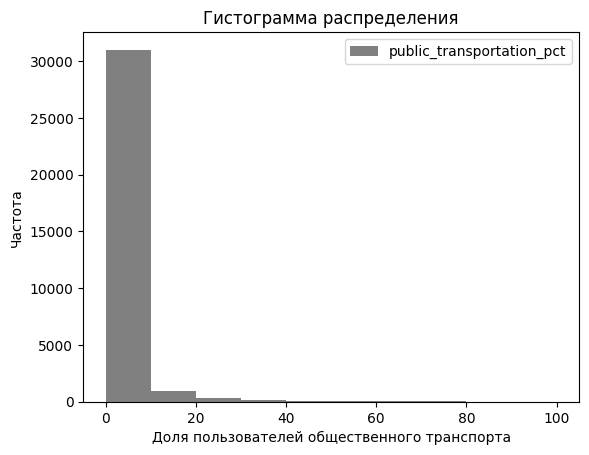

Соединение с PostgreSQL закрыто


In [10]:
import psycopg2
import pandas
import matplotlib.pyplot as plt

def get_connection(database_name):
    # Прописываем функцию для подключения к нашей базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="26102006",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

try:
    connection = get_connection("BD1")
    
    # Пишем SQL-запрос для выборки нужных данных
    query = "SELECT * FROM public_transportation_statistics_by_zip_code WHERE public_transportation_pct >= 0;"
    
    # Загрузим данные в DataFrame
    my_data = pandas.read_sql(query, connection)

    # Проведем построение гистограммы распределения
    my_data.plot.hist(y='public_transportation_pct', color='grey')
    plt.title('Гистограмма распределения')
    plt.xlabel('Доля пользователей общественного транспорта')
    plt.ylabel('Частота')
    plt.show()

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрываем подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

## 6. Теперь группируем клиентов по их почтовому индексу и проверяем среднее количество транзакций для одного клиента. Затем экспортируем эти данные в Excel и создаем диаграмму рассеяния, чтобы лучше понять взаимосвязь между использованием общественного транспорта и продажами.

Данные успешно экспортированы в файл: analysis_sales.csv


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_19348\53306580.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pandas.read_sql(query, connection)


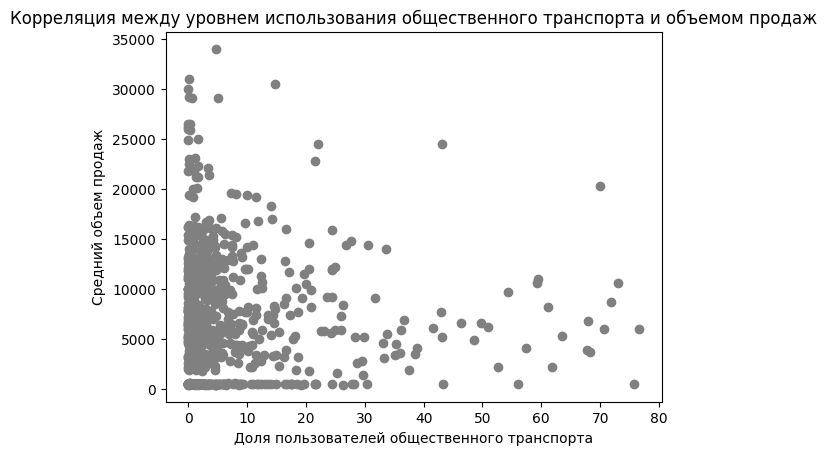

Соединение с PostgreSQL закрыто


In [ ]:
import psycopg2
import pandas
import matplotlib.pyplot as plt

def get_connection(database_name):
    # Прописываем функцию для подключения к нашей базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="26102006",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

try:
    connection = get_connection("BD1")
    
    # Составляем SQL-запрос для группировки данных по zip_code
    query = """SELECT pts.zip_code,
    COUNT(DISTINCT c.customer_id) AS customer_count,
    COUNT(*) / COUNT(DISTINCT c.customer_id) AS avg_transactions,
    AVG(s.sales_amount) AS avg_sales_amount, pts.public_transportation_pct
    FROM 
        customers c
    JOIN 
        sales s ON c.customer_id = s.customer_id
    JOIN 
        public_transportation_statistics_by_zip_code pts ON c.postal_code = pts.zip_code
    WHERE public_transportation_pct >= 0
    GROUP BY pts.zip_code, pts.public_transportation_pct;
    """
    
    # Загрузим данные в DataFrame
    data = pandas.read_sql(query, connection)

    # После экспортируем данные в CSV
    csv_file = "analysis_sales.csv"
    data.to_csv(csv_file, index=False)
    print(f"Данные успешно экспортированы в файл: {csv_file}")

    # Построим диаграмму рассеяния
    plt.scatter(data['public_transportation_pct'], data['avg_sales_amount'], color='grey')
    plt.title('Корреляция между уровнем использования общественного транспорта и объемом продаж')
    plt.xlabel('Доля пользователей общественного транспорта')
    plt.ylabel('Средний объем продаж')
    plt.show()

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрываем подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")